In [ ]:
import databento as db
from bet_edge.data_io.env_cred_provider import EnvCredProvider

ecp = EnvCredProvider()
client = db.Historical()

cost = client.metadata.get_cost(
    start="2020-06-01",
    end="2025-01-08",
    dataset="GLBX.MDP3",
    symbols=["ES.v.0"],
    stype_in="continuous",
    schema="bbo-1s",    
)

print(cost)

113.178172409534


: 

In [7]:
%load_ext autoreload
%autoreload 2

In [14]:
details = client.batch.submit_job(
    start="2016-06-01",
    end="2025-01-08",
    dataset="GLBX.MDP3",
    symbols=["ES.v.0"],
    stype_in="continuous",
    schema="bbo-1m",        
)

In [17]:
jobs = client.batch.list_jobs(
    states=["queued", "processing", "done"],
    since="2022-06-01",
)
for job in jobs:
    print(job['id'])

XNAS-20241231-BE476U9FWY
XNAS-20241231-RL6BYE7PH6
XNAS-20241231-7MC7QNWNV8
GLBX-20250107-C6N9TYTSYB
GLBX-20250107-HFJT4WNW3Y
GLBX-20250109-36CHMNEWWH
GLBX-20250109-SWND9V68AF


In [20]:
client.batch.download('GLBX-20250109-SWND9V68AF', output_dir='C:\\Users\\Ashle\\OneDrive\\Documents\\bet_edge\\data')

[WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/symbology.json'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/glbx-mdp3-20160605.bbo-1m.dbn.zst'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/metadata.json'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/glbx-mdp3-20160609.bbo-1m.dbn.zst'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/glbx-mdp3-20160603.bbo-1m.dbn.zst'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/glbx-mdp3-20160612.bbo-1m.dbn.zst'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/glbx-mdp3-20160601.bbo-1m.dbn.zst'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents/bet_edge/data/GLBX-20250109-SWND9V68AF/glbx-mdp3-20160610.bbo-1m.dbn.zst'),
 WindowsPath('C:/Users/Ashle/OneDrive/Documents

In [9]:
from bet_edge.data_io.databento import *
import polars as pl

df = combine_dbn_files_to_polars(r"C:\Users\Ashle\OneDrive\Documents\bet_edge\data\GLBX-20250109-36CHMNEWWH")

df

ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
"datetime[ns, UTC]",u8,u16,u32,f64,f64,f64,f64,u64,str
2016-06-01 00:00:00 UTC,33,1,6505,2095.0,2095.5,2095.0,2095.25,118,"""ES.v.0"""
2016-06-01 00:01:00 UTC,33,1,6505,2095.25,2095.25,2095.0,2095.25,34,"""ES.v.0"""
2016-06-01 00:02:00 UTC,33,1,6505,2095.25,2095.5,2095.25,2095.25,109,"""ES.v.0"""
2016-06-01 00:03:00 UTC,33,1,6505,2095.5,2095.5,2095.0,2095.0,56,"""ES.v.0"""
2016-06-01 00:04:00 UTC,33,1,6505,2095.0,2095.5,2095.0,2095.25,66,"""ES.v.0"""
…,…,…,…,…,…,…,…,…,…
2025-01-07 23:55:00 UTC,33,1,5002,5956.5,5957.0,5956.25,5956.75,65,"""ES.v.0"""
2025-01-07 23:56:00 UTC,33,1,5002,5956.75,5957.0,5956.75,5957.0,52,"""ES.v.0"""
2025-01-07 23:57:00 UTC,33,1,5002,5957.0,5958.0,5957.0,5958.0,159,"""ES.v.0"""


In [11]:
df.write_parquet(r"C:\Users\Ashle\OneDrive\Documents\bet_edge\data\es_continuous_20160601_to_20250108")




In [19]:
import s3fs

fs = s3fs.S3FileSystem()
with fs.open('s3://bet-edge/futures/es_cont_ohlcv_20160601_to_20250108.parquet', mode='wb') as f:
    df.write_parquet(f)

In [ ]:
bbo_df = combine_dbn_files_to_polars(r"C:\Users\Ashle\OneDrive\Documents\bet_edge\data\GLBX-20250109-SWND9V68AF")
bbo_df.write_parquet(r"C:\Users\Ashle\OneDrive\Documents\bet_edge\data\es_cont_bbo_20160601_to_20250108")

In [20]:
with fs.open('s3://bet-edge/futures/es_cont_bbo_20160601_to_20250108.parquet', mode='wb') as f:
    bbo_df.write_parquet(f)

In [13]:

test_s3_read = pl.read_csv('s3://bet-edge/transfer_data.csv')
test_s3_read

id,name
i64,str
3,"""Charlie"""
4,"""David"""


In [21]:
with fs.open('s3://bet-edge/transfer_data.csv', mode='wb') as f:
    test_s3_read.write_csv(f)

In [22]:
bbo_df

ts_recv,ts_event,rtype,publisher_id,instrument_id,side,price,size,flags,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol
"datetime[ns, UTC]","datetime[ns, UTC]",u8,u16,u32,str,f64,u32,u8,u32,f64,f64,u32,u32,u32,u32,str
2016-06-01 00:01:00 UTC,2016-06-01 00:00:58.516349357 UTC,196,1,6505,"""N""",2095.25,1,138,3462964,2095.0,2095.25,91,53,49,22,"""ES.v.0"""
2016-06-01 00:02:00 UTC,2016-06-01 00:01:53.904507451 UTC,196,1,6505,"""N""",2095.25,1,138,3463272,2095.0,2095.25,88,61,49,25,"""ES.v.0"""
2016-06-01 00:03:00 UTC,2016-06-01 00:02:57.749225483 UTC,196,1,6505,"""N""",2095.25,5,138,3463781,2095.25,2095.5,63,85,37,48,"""ES.v.0"""
2016-06-01 00:04:00 UTC,2016-06-01 00:03:44.042991822 UTC,196,1,6505,"""N""",2095.0,1,138,3464251,2095.0,2095.25,64,36,42,19,"""ES.v.0"""
2016-06-01 00:05:00 UTC,2016-06-01 00:04:56.027707211 UTC,196,1,6505,"""N""",2095.25,1,138,3464750,2095.0,2095.25,54,44,34,22,"""ES.v.0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-07 23:55:00 UTC,2025-01-07 23:54:45.121002135 UTC,196,1,5002,"""B""",5956.5,2,130,25181631,5956.25,5956.5,6,10,6,7,"""ES.v.0"""
2025-01-07 23:56:00 UTC,2025-01-07 23:55:58.074718711 UTC,196,1,5002,"""A""",5956.75,1,130,25182603,5956.75,5957.0,13,23,5,17,"""ES.v.0"""
2025-01-07 23:57:00 UTC,2025-01-07 23:56:54.678479389 UTC,196,1,5002,"""B""",5957.0,4,130,25183239,5956.75,5957.0,10,15,10,13,"""ES.v.0"""


In [25]:
df

ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
"datetime[ns, UTC]",u8,u16,u32,f64,f64,f64,f64,u64,str
2016-06-01 00:00:00 UTC,33,1,6505,2095.0,2095.5,2095.0,2095.25,118,"""ES.v.0"""
2016-06-01 00:01:00 UTC,33,1,6505,2095.25,2095.25,2095.0,2095.25,34,"""ES.v.0"""
2016-06-01 00:02:00 UTC,33,1,6505,2095.25,2095.5,2095.25,2095.25,109,"""ES.v.0"""
2016-06-01 00:03:00 UTC,33,1,6505,2095.5,2095.5,2095.0,2095.0,56,"""ES.v.0"""
2016-06-01 00:04:00 UTC,33,1,6505,2095.0,2095.5,2095.0,2095.25,66,"""ES.v.0"""
…,…,…,…,…,…,…,…,…,…
2025-01-07 23:55:00 UTC,33,1,5002,5956.5,5957.0,5956.25,5956.75,65,"""ES.v.0"""
2025-01-07 23:56:00 UTC,33,1,5002,5956.75,5957.0,5956.75,5957.0,52,"""ES.v.0"""
2025-01-07 23:57:00 UTC,33,1,5002,5957.0,5958.0,5957.0,5958.0,159,"""ES.v.0"""


c:\Users\Ashle\OneDrive\Documents\bet_edge\.venv\Lib\site-packages\pandas\core\algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


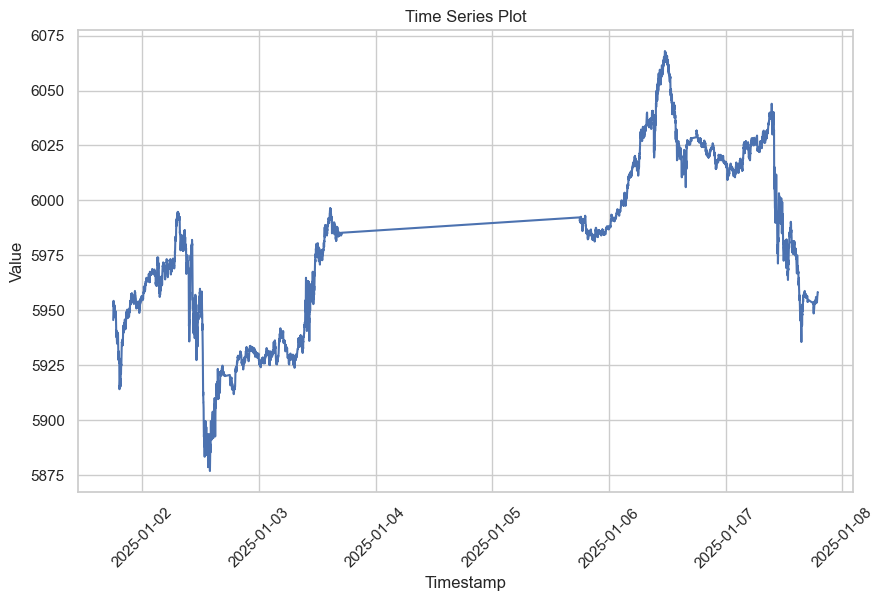

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import polars as pl

# Assuming df is your Polars DataFrame
# Ensure ts_event is of datetime type
df = df.with_columns(
    pl.col("ts_event").cast(pl.Datetime),
    pl.col("ts_event").cast(pl.Datetime).dt.convert_time_zone("US/Eastern").alias("ts_event_est")
    )

# Convert the Python datetime to a Polars-compatible literal
filter_date = pl.lit(datetime(2025, 1, 1))

# Filter the DataFrame
filtered_df = df.filter(pl.col("ts_event") > filter_date)

# Convert to Pandas for plotting
pandas_df = filtered_df.to_pandas()

# Plotting
sns.set_theme(style="whitegrid")  # Optional: Set Seaborn style
plt.figure(figsize=(10, 6))

# Ensure continuous plotting without gaps by setting `sort=False`
sns.lineplot(x="ts_event_est", y="close", data=pandas_df, sort=False)

plt.title("Time Series Plot")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [38]:
# Extract unique days
unique_days = filtered_df.select(
    pl.col("ts_event").dt.truncate("1d").alias("day")
).unique()

# Extract unique hours
unique_hours = filtered_df.select(
    pl.col("ts_event").dt.hour().alias("hour")
).unique()

# Convert to lists
days_list = unique_days["day"].to_list()
hours_list = unique_hours["hour"].to_list()

print("Unique Days:", days_list)
print("Unique Hours:", hours_list)

Unique Days: [datetime.datetime(2025, 1, 3, 0, 0), datetime.datetime(2025, 1, 7, 0, 0), datetime.datetime(2025, 1, 1, 0, 0), datetime.datetime(2025, 1, 5, 0, 0), datetime.datetime(2025, 1, 2, 0, 0), datetime.datetime(2025, 1, 6, 0, 0)]
Unique Hours: [18, 0, 3, 9, 21, 15, 12, 6, 10, 1, 16, 7, 13, 4, 19, 2, 8, 5, 20, 17, 14, 23, 11]


In [48]:
# Function to assign group numbers based on cumulative volume
def assign_groups(volumes, threshold=5000):
    group = 0
    current_sum = 0
    groups = []
    for v in volumes:
        if current_sum + v > threshold:
            group += 1
            current_sum = v
        else:
            current_sum += v
        groups.append(group)
    return groups

# Apply the grouping function
group_numbers = assign_groups(df["volume"].to_list())

# Add the group numbers to the DataFrame
df = df.with_columns(pl.Series("group", group_numbers))

# Perform the aggregations for each group
aggregated_df = df.group_by(pl.col("group")).agg([
    pl.col("ts_event_est").max(),
    pl.col("open").first(),
    pl.col("high").max().alias("high"),
    pl.col("low").min().alias("low"),
    pl.col("close").last().alias("close"),
    pl.col("volume").sum().alias("total_volume")
])

aggregated_df.sort(pl.col("ts_event_est"))

group,ts_event_est,open,high,low,close,total_volume
i64,"datetime[μs, US/Eastern]",f64,f64,f64,f64,u64
0,2016-05-31 21:02:00 EDT,2095.0,2095.75,2094.25,2094.25,4959
1,2016-05-31 21:43:00 EDT,2094.25,2096.0,2093.75,2096.0,4926
2,2016-05-31 22:17:00 EDT,2095.75,2097.25,2095.5,2097.0,4989
3,2016-05-31 22:36:00 EDT,2097.0,2099.25,2096.75,2098.75,4989
4,2016-05-31 23:41:00 EDT,2098.75,2099.0,2096.75,2097.0,4937
…,…,…,…,…,…,…
672742,2025-01-07 16:20:00 EST,5957.5,5959.5,5956.5,5956.5,4959
672743,2025-01-07 16:40:00 EST,5956.5,5957.5,5955.5,5955.75,4898
672744,2025-01-07 16:57:00 EST,5955.75,5957.0,5953.5,5954.25,4996


In [65]:
bbo_series_plus_10 = bbo_df.with_columns((pl.col("ts_recv") + pl.duration(minutes=10)).alias("ts_recv_plus_10m"))
filt_bbo = bbo_df.select(pl.col("ts_recv").cast(pl.Datetime("us", time_zone="UTC")), pl.col("price").alias("price_10m_future"))
bbo_w_future_price = bbo_series_plus_10.join(filt_bbo, how='left', left_on='ts_recv_plus_10m', right_on='ts_recv')
bbo_w_future_price.filter(pl.col("price_10m_future").is_not_null()).tail(100)

ts_recv,ts_event,rtype,publisher_id,instrument_id,side,price,size,flags,sequence,bid_px_00,ask_px_00,bid_sz_00,ask_sz_00,bid_ct_00,ask_ct_00,symbol,ts_recv_plus_10m,price_10m_future
"datetime[ns, UTC]","datetime[ns, UTC]",u8,u16,u32,str,f64,u32,u8,u32,f64,f64,u32,u32,u32,u32,str,"datetime[μs, UTC]",f64
2025-01-07 21:06:00 UTC,2025-01-07 21:05:59.840312045 UTC,196,1,5002,"""A""",5956.75,1,130,25018679,5956.75,5957.0,31,113,17,56,"""ES.v.0""",2025-01-07 21:16:00 UTC,5957.5
2025-01-07 21:07:00 UTC,2025-01-07 21:06:59.318108031 UTC,196,1,5002,"""B""",5956.75,1,130,25022478,5956.5,5956.75,69,26,39,17,"""ES.v.0""",2025-01-07 21:17:00 UTC,5958.0
2025-01-07 21:08:00 UTC,2025-01-07 21:07:59.655144249 UTC,196,1,5002,"""B""",5956.75,1,130,25026494,5956.5,5957.0,58,57,35,35,"""ES.v.0""",2025-01-07 21:18:00 UTC,5958.75
2025-01-07 21:09:00 UTC,2025-01-07 21:08:59.152276865 UTC,196,1,5002,"""B""",5957.5,1,130,25030159,5957.25,5957.5,71,21,38,11,"""ES.v.0""",2025-01-07 21:19:00 UTC,5958.75
2025-01-07 21:10:00 UTC,2025-01-07 21:09:58.043552703 UTC,196,1,5002,"""A""",5957.25,2,130,25033988,5957.25,5957.5,42,41,21,19,"""ES.v.0""",2025-01-07 21:20:00 UTC,5958.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-07 23:45:00 UTC,2025-01-07 23:44:49.115891249 UTC,196,1,5002,"""B""",5954.0,1,130,25169585,5953.75,5954.0,7,14,7,13,"""ES.v.0""",2025-01-07 23:55:00 UTC,5956.5
2025-01-07 23:46:00 UTC,2025-01-07 23:45:56.109043003 UTC,196,1,5002,"""B""",5954.75,2,130,25170772,5954.5,5955.0,19,19,17,16,"""ES.v.0""",2025-01-07 23:56:00 UTC,5956.75
2025-01-07 23:47:00 UTC,2025-01-07 23:46:47.911922685 UTC,196,1,5002,"""A""",5954.0,1,130,25172371,5954.0,5954.25,15,9,15,7,"""ES.v.0""",2025-01-07 23:57:00 UTC,5957.0


In [80]:
tdf = df.with_columns(
    pl.col("close").diff().alias("delta")
)
tdf = tdf.with_columns(
    [
    pl.when(pl.col("delta") > 0)
    .then(pl.col("delta"))
    .otherwise(0.0)
    .alias("gain"),

    pl.when(pl.col("delta") < 0)
    .then(-pl.col("delta"))
    .otherwise(0.0)
    .alias("loss"),    
    ]
)

tdf = tdf.with_columns([
    pl.col("gain").rolling_mean(window_size=100).alias("avg_gain"),
    pl.col("loss").rolling_mean(window_size=100).alias("avg_loss")
])

tdf = tdf.with_columns([
    (pl.col("avg_gain") / pl.col("avg_loss")).alias("RS"),
    (100 - (100 / (1 + (pl.col("avg_gain") / pl.col("avg_loss"))))).alias("RSI")
])
tdf

ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,ts_event_est,group,delta,gain,loss,avg_gain,avg_loss,RS,RSI
datetime[μs],u8,u16,u32,f64,f64,f64,f64,u64,str,"datetime[μs, US/Eastern]",i64,f64,f64,f64,f64,f64,f64,f64
2016-06-01 00:00:00,33,1,6505,2095.0,2095.5,2095.0,2095.25,118,"""ES.v.0""",2016-05-31 20:00:00 EDT,0,null,0.0,0.0,null,null,null,null
2016-06-01 00:01:00,33,1,6505,2095.25,2095.25,2095.0,2095.25,34,"""ES.v.0""",2016-05-31 20:01:00 EDT,0,0.0,0.0,0.0,null,null,null,null
2016-06-01 00:02:00,33,1,6505,2095.25,2095.5,2095.25,2095.25,109,"""ES.v.0""",2016-05-31 20:02:00 EDT,0,0.0,0.0,0.0,null,null,null,null
2016-06-01 00:03:00,33,1,6505,2095.5,2095.5,2095.0,2095.0,56,"""ES.v.0""",2016-05-31 20:03:00 EDT,0,-0.25,0.0,0.25,null,null,null,null
2016-06-01 00:04:00,33,1,6505,2095.0,2095.5,2095.0,2095.25,66,"""ES.v.0""",2016-05-31 20:04:00 EDT,0,0.25,0.25,0.0,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-07 23:55:00,33,1,5002,5956.5,5957.0,5956.25,5956.75,65,"""ES.v.0""",2025-01-07 18:55:00 EST,672746,0.25,0.25,0.0,0.235,0.2425,0.969072,49.21466
2025-01-07 23:56:00,33,1,5002,5956.75,5957.0,5956.75,5957.0,52,"""ES.v.0""",2025-01-07 18:56:00 EST,672746,0.25,0.25,0.0,0.2325,0.2425,0.958763,48.947368
2025-01-07 23:57:00,33,1,5002,5957.0,5958.0,5957.0,5958.0,159,"""ES.v.0""",2025-01-07 18:57:00 EST,672746,1.0,1.0,0.0,0.235,0.2425,0.969072,49.21466


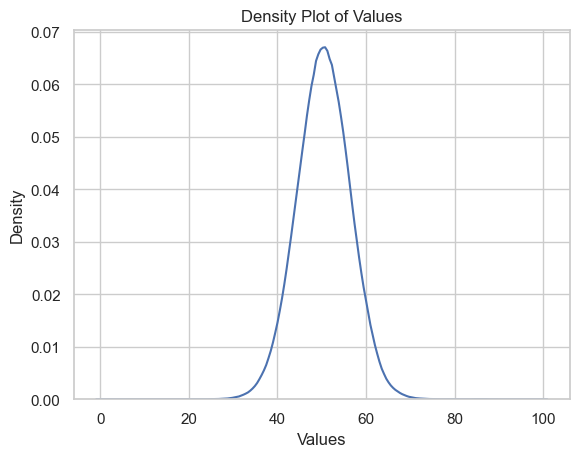

In [82]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the Polars column to a Pandas Series
values_series = tdf["RSI"].to_pandas()

# Create a density plot using Seaborn
sns.kdeplot(values_series)
plt.title("Density Plot of Values")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

In [86]:
tdf.select(pl.col("RSI")).drop_nulls().describe([.2,.4,.6,.8])

statistic,RSI
str,f64
"""count""",3.017501e6
"""null_count""",0.0
"""mean""",NaN
"""std""",NaN
"""min""",0.0
"""20%""",45.402299
"""40%""",48.951049
"""60%""",51.960784
"""80%""",55.479452


In [75]:
fast_period = 25
slow_period = 50
signal_period = 12

tdf = df.with_columns([
    pl.col("close").ewm_mean(alpha=2/(fast_period + 1)).alias("ema_fast"),
    pl.col("close").ewm_mean(alpha=2/(slow_period + 1)).alias("ema_slow")
])

tdf = tdf.with_columns((pl.col("ema_fast") - pl.col("ema_slow")).alias('MACD'))
tdf = tdf.with_columns(
    pl.col('MACD').ewm_mean(alpha=2 / (signal_period + 1)).alias("Signal")
)
tdf

ts_event,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,ts_event_est,group,ema_fast,ema_slow,MACD,Signal
datetime[μs],u8,u16,u32,f64,f64,f64,f64,u64,str,"datetime[μs, US/Eastern]",i64,f64,f64,f64,f64
2016-06-01 00:00:00,33,1,6505,2095.0,2095.5,2095.0,2095.25,118,"""ES.v.0""",2016-05-31 20:00:00 EDT,0,2095.25,2095.25,0.0,0.0
2016-06-01 00:01:00,33,1,6505,2095.25,2095.25,2095.0,2095.25,34,"""ES.v.0""",2016-05-31 20:01:00 EDT,0,2095.25,2095.25,0.0,0.0
2016-06-01 00:02:00,33,1,6505,2095.25,2095.5,2095.25,2095.25,109,"""ES.v.0""",2016-05-31 20:02:00 EDT,0,2095.25,2095.25,0.0,0.0
2016-06-01 00:03:00,33,1,6505,2095.5,2095.5,2095.0,2095.0,56,"""ES.v.0""",2016-05-31 20:03:00 EDT,0,2095.179808,2095.183701,-0.003893,-0.001229
2016-06-01 00:04:00,33,1,6505,2095.0,2095.5,2095.0,2095.25,66,"""ES.v.0""",2016-05-31 20:04:00 EDT,0,2095.196179,2095.198042,-0.001864,-0.001401
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2025-01-07 23:55:00,33,1,5002,5956.5,5957.0,5956.25,5956.75,65,"""ES.v.0""",2025-01-07 18:55:00 EST,672746,5954.874011,5954.429028,0.444983,0.274852
2025-01-07 23:56:00,33,1,5002,5956.75,5957.0,5956.75,5957.0,52,"""ES.v.0""",2025-01-07 18:56:00 EST,672746,5955.037549,5954.52985,0.507698,0.310675
2025-01-07 23:57:00,33,1,5002,5957.0,5958.0,5957.0,5958.0,159,"""ES.v.0""",2025-01-07 18:57:00 EST,672746,5955.26543,5954.665935,0.599495,0.355109


In [79]:
from bet_edge.indicators.ohlcv_time_series import calc_rsi

test_series = pl.DataFrame({
        "price": [100, 102, 101, 103, 105, 104, 106, 108, 107, 109]
    })

test_calc_rsi = calc_rsi(test_series, 'price', 3)
test_calc_rsi

price,delta,gain,loss,avg_gain,avg_loss,RS,RSI
i64,i64,f64,f64,f64,f64,f64,f64
100,null,0.0,0.0,null,null,null,null
102,2,2.0,0.0,null,null,null,null
101,-1,0.0,1.0,0.666667,0.333333,2.0,66.666667
103,2,2.0,0.0,1.333333,0.333333,4.0,80.0
105,2,2.0,0.0,1.333333,0.333333,4.0,80.0
104,-1,0.0,1.0,1.333333,0.333333,4.0,80.0
106,2,2.0,0.0,1.333333,0.333333,4.0,80.0
108,2,2.0,0.0,1.333333,0.333333,4.0,80.0
107,-1,0.0,1.0,1.333333,0.333333,4.0,80.0
